In [195]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import numpy as np
PLOT_FOLDER = "../data/raw/plots/filmseries/"
PLOT_FOLDER_REVENUE = "../data/raw/plots/filmseriesrevenue/"

In [196]:
# loading file
df = pd.read_csv('../data/processed/movie_stats/movie_stats.csv')

In [197]:
len(df)

33

In [198]:
df.head()

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue
0,0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133
1,1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302
2,2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111
3,3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039
4,4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180


In [199]:
# # filtering out movies before 2017
# df = df[df['release_date'] >= '2017-01-01']

In [200]:
# getting all the cast columns and convert to list
cast_cols = df["cast"].tolist()

# getting all movies revenue and convert to list
revenue_cols = df["movie_revenue"].tolist()


In [201]:
percentages = []
revenues = []

casts = [re.findall(r"'([^,]*?)':", cast) for cast in cast_cols]
print(casts[0])


['Brie Larson', 'Teyonah Parris', 'Iman Vellani', 'Zawe Ashton', 'Park Seo-jun', 'Samuel L. Jackson', 'Gary Lewis', 'Zenobia Shroff', 'Mohan Kapur', 'Saagar Shaikh', 'Lashana Lynch', 'Leila Farzad', 'Abraham Popoola', 'Daniel Ings', 'Kya Garwood', 'Tessa Thompson', 'Hailee Steinfeld', 'Kelsey Grammer', 'Akira Akbar', 'Jude Law', 'Annette Bening']


In [202]:
# getting a set of top actors 
actors = set()
TOP = 30

for cast in casts:
    for i in range(min(TOP, len(cast) - 1)):
        actors.add(cast[i])

actors = list(actors)
print(actors)
print(len(actors))

['Claudia Kim', 'Jennifer Connelly', 'Onira Tarés', 'John C. Reilly', 'Nicole Alexandra Shipley', 'Jeremy Renner', 'Jim Palmer', 'Denzel Whitaker', 'Edward Norton', 'Sean Gunn', 'Robert John Burke', 'Yolanda Lynes', 'Abby Ryder Fortson', 'Ophelia Lovibond', 'Benedict Cumberbatch', 'Hemky Madera', 'Zawe Ashton', 'Ray Winstone', 'Jodi Long', 'Daniel Kaluuya', 'Jim Cramer', 'Michael Brandon', 'David S. Lee', 'Alan Dale', 'Rod Hallett', 'Clare Dunne', 'Benicio del Toro', 'Anthony Mackie', 'Joshua Harto', 'Chuku Modu', 'Russell Richardson', 'Heidi Moneymaker', 'Sharif Atkins', 'Adriana Barraza', 'Zack Duhame', 'Paula Newsome', 'Jeff Goldblum', 'Anthony Hopkins', 'Jonny Brugh', 'Sam Rockwell', 'Callan Mulvey', 'Jude Law', 'Darcy Shean', 'Ever Anderson', 'Rashmi Rustagi', 'Tom Holland', 'Brie Larson', 'Ronny Chieng', 'Alfre Woodard', 'Bernard White', 'Julia Vera', 'Richard Cetrone', 'Tom Virtue', 'Alan Wells', 'Hugo Weaving', 'Tim Guinee', 'Josh Brolin', 'Michael Kenneth Williams', 'Rob Zombi

In [203]:
# building a vector for each movie
cast_vectors = []

for cast in casts:
    cast_vector = np.zeros(len(actors))
    
    for i in range(len(cast)):
        actor = cast[i]

        if actor in actors:
            score = 1
            cast_vector[actors.index(actor)] = score
    
    cast_vectors.append(cast_vector)
cast_vectors = np.array(cast_vectors)

In [204]:
cast_vectors[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

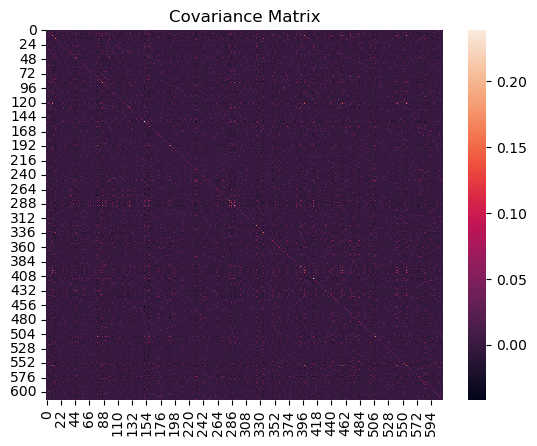

In [205]:
# making a covariance plot
import seaborn as sns

cov = np.cov(cast_vectors.T)
sns.heatmap(cov)
plt.title('Covariance Matrix')
plt.savefig(PLOT_FOLDER + "/covariance.png")
plt.show()


/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/ditw/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

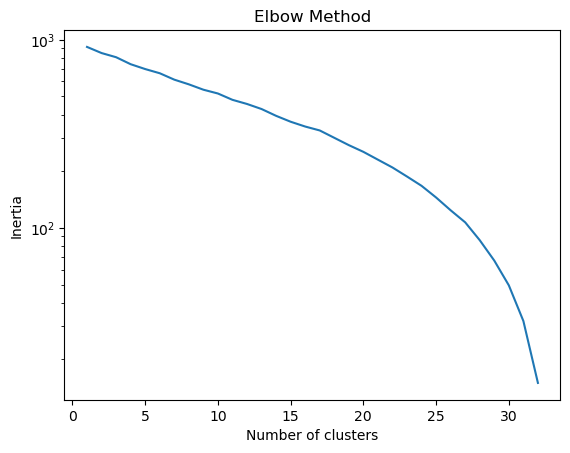

In [206]:
# applying k-means clustering and make elbow plot
from sklearn.cluster import KMeans

inertia = []
to = len(cast_vectors)
for i in range(1, to):
    # using the hamming distance
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cast_vectors)
    inertia.append(kmeans.inertia_)
    

plt.plot(range(1, to), inertia)
plt.title('Elbow Method')
# logaritmic scale on y axis
plt.yscale('log')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig(PLOT_FOLDER + "/elbow.png")
plt.show()


/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_98623/658155494.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, method='complete')


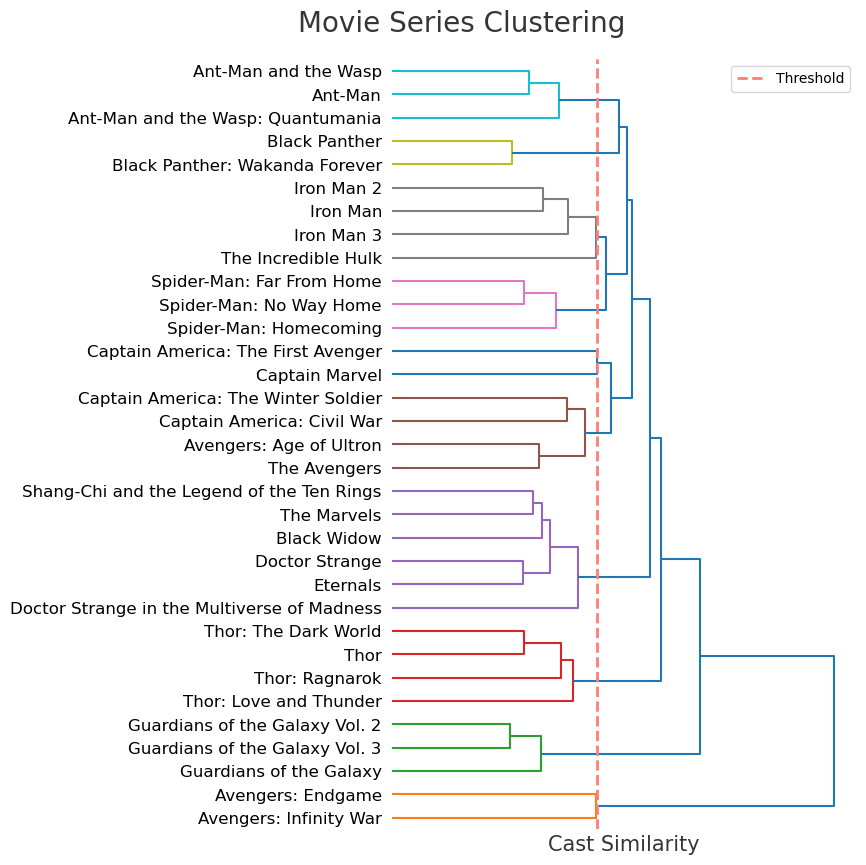

In [207]:
# trying with hiararchical clustering using hamming distance
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram

number_of_clusters = 10

# using the hamming distance
dist = pairwise_distances(cast_vectors, metric='hamming')
link = linkage(dist, method='complete')


max_d = 0
for i in range(len(link) + 1 - number_of_clusters):
    max_d = max(max_d, link[i][2])

# getting the clusters
clusters = {}
for i in range(len(link) + 1):
    clusters[i] = [i]

# ploting a threshold line based on max_d to make number_of_clusters clusters
plt.figure(figsize=(6, 10))
# title in the middle
plt.title("Movie Series Clustering", fontsize=20, pad=20, c="#353535")
plt.gca().title.set_position([.15, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

den = dendrogram(link, orientation='right', labels=range(len(link) + 1), color_threshold=max_d)
plt.axvline(x=max_d, c='#ff7d78', ls='--', lw=2, label='Threshold')
plt.xlabel('Cast Similarity', fontsize=15, c="#353535")

# removing the ticks on x axis
plt.gca().get_xaxis().set_ticks([])

leaves = den["leaves"]

movie_names = [df['movie_name'][int(xtick)] for xtick in leaves]

# bold
plt.gca().set_yticklabels(movie_names, rotation=0, fontsize=12)
plt.savefig(PLOT_FOLDER + "/dendrogram_threshold.png")
plt.legend()
plt.show()


In [208]:
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

# clusters = fcluster(link, max_d, criterion='distance')
agg_clustering = AgglomerativeClustering(n_clusters=number_of_clusters, metric='l1', linkage='complete')
agg_clustering.fit(cast_vectors)

clusters = agg_clustering.labels_

# getting the movies in each cluster
movies_in_clusters = {}
for i in range(len(clusters)):
    movie_title = df.iloc[i]['movie_name']
    cluster = clusters[i]
    if cluster in movies_in_clusters:
        movies_in_clusters[cluster].append(movie_title)
    else:
        movies_in_clusters[cluster] = [movie_title]

# printing the movies in each cluster
for cluster in movies_in_clusters:
    print('Cluster ' + str(cluster) + ':')
    print(movies_in_clusters[cluster])
    print('')


# loading annotated file
df = pd.read_csv('../data/processed/movie_stats/movie_stats_annotated.csv', index_col=0)

# appending the cluster column to df
df['film_series_cluster'] = clusters
# df.head()
# adding the original index column

df.to_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index=True)

Cluster 2:
['The Marvels', 'Doctor Strange in the Multiverse of Madness', 'Shang-Chi and the Legend of the Ten Rings', 'Eternals', 'Black Widow', 'Doctor Strange', 'Captain America: The First Avenger']

Cluster 4:
['Guardians of the Galaxy Vol. 3', 'Guardians of the Galaxy Vol. 2', 'Guardians of the Galaxy']

Cluster 3:
['Spider-Man: No Way Home', 'Spider-Man: Homecoming', 'Spider-Man: Far From Home']

Cluster 7:
['Avengers: Infinity War', 'Avengers: Endgame']

Cluster 8:
['Ant-Man and the Wasp: Quantumania', 'Ant-Man', 'Ant-Man and the Wasp']

Cluster 6:
['Black Panther: Wakanda Forever', 'Black Panther']

Cluster 5:
['Thor: Love and Thunder', 'Thor', 'Thor: Ragnarok', 'Thor: The Dark World']

Cluster 1:
['The Avengers', 'Avengers: Age of Ultron', 'Captain America: Civil War', 'Captain America: The Winter Soldier']

Cluster 9:
['Captain Marvel']

Cluster 0:
['Iron Man', 'Iron Man 2', 'Iron Man 3', 'The Incredible Hulk']



In [209]:
    # loading file
# giving index a name
df = pd.read_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index_col=0)
df = df.rename_axis('index')

In [210]:
# sorting df based on release date ascending
df = df.sort_values(by=['release_date'], ascending=True)

In [211]:
df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster
index,,,,,,,,,,
13,Iron Man,tt0371746,2008-04-30,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],['Marvel Studios'],140000000,585174222,8,0
27,The Incredible Hulk,tt0800080,2008-06-12,"{'Edward Norton': 'Bruce Banner / The Hulk', '...",['Louis Leterrier'],"['Marvel Studios', 'Valhalla Motion Pictures']",150000000,163712074,0,0
15,Iron Man 2,tt1228705,2010-04-28,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],"['Marvel Studios', 'Fairview Entertainment']",200000000,623933331,8,0
18,Thor,tt0800369,2011-04-21,"{'Chris Hemsworth': 'Thor Odinson', 'Natalie P...",['Kenneth Branagh'],['Marvel Studios'],150000000,449326618,2,5
29,Captain America: The First Avenger,tt0458339,2011-07-22,{'Chris Evans': 'Steve Rogers / Captain Americ...,['Joe Johnston'],['Marvel Studios'],140000000,370569774,1,2


In [212]:
# extracting the clusters from df
clusters = df['film_series'].tolist()

In [213]:
df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster
index,,,,,,,,,,
13,Iron Man,tt0371746,2008-04-30,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],['Marvel Studios'],140000000,585174222,8,0
27,The Incredible Hulk,tt0800080,2008-06-12,"{'Edward Norton': 'Bruce Banner / The Hulk', '...",['Louis Leterrier'],"['Marvel Studios', 'Valhalla Motion Pictures']",150000000,163712074,0,0
15,Iron Man 2,tt1228705,2010-04-28,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Jon Favreau'],"['Marvel Studios', 'Fairview Entertainment']",200000000,623933331,8,0
18,Thor,tt0800369,2011-04-21,"{'Chris Hemsworth': 'Thor Odinson', 'Natalie P...",['Kenneth Branagh'],['Marvel Studios'],150000000,449326618,2,5
29,Captain America: The First Avenger,tt0458339,2011-07-22,{'Chris Evans': 'Steve Rogers / Captain Americ...,['Joe Johnston'],['Marvel Studios'],140000000,370569774,1,2


In [214]:
film_series_sorted = {}

for movie in df.itertuples():
    # getting the index
    movie = tuple(movie)
    index = movie[0]
    # index = movie["Unnamed: 0"]
    film_series = movie[9]
    if film_series == 0:
        continue
    
    movie_tuple = (movie[1], movie[8], index, film_series)
    if film_series in film_series_sorted:
        film_series_sorted[film_series].append(movie_tuple)
    else:
        film_series_sorted[film_series] = [movie_tuple]

film_series_sorted


{8: [('Iron Man', 585174222, 13, 8),
  ('Iron Man 2', 623933331, 15, 8),
  ('Iron Man 3', 1215577205, 25, 8)],
 2: [('Thor', 449326618, 18, 2),
  ('Thor: The Dark World', 644783140, 22, 2),
  ('Thor: Ragnarok', 855301806, 19, 2),
  ('Thor: Love and Thunder', 760928081, 6, 2)],
 1: [('Captain America: The First Avenger', 370569774, 29, 1),
  ('Captain America: The Winter Soldier', 714766572, 31, 1),
  ('Captain America: Civil War', 1155046416, 14, 1)],
 6: [('The Avengers', 1518815515, 7, 6),
  ('Avengers: Age of Ultron', 1405403694, 11, 6),
  ('Avengers: Infinity War', 2052415039, 3, 6),
  ('Avengers: Endgame', 2800000000, 10, 6)],
 9: [('Guardians of the Galaxy', 772776600, 30, 9),
  ('Guardians of the Galaxy Vol. 2', 863756051, 21, 9),
  ('Guardians of the Galaxy Vol. 3', 845430302, 1, 9)],
 4: [('Ant-Man', 519311965, 28, 4),
  ('Ant-Man and the Wasp', 622674139, 32, 4),
  ('Ant-Man and the Wasp: Quantumania', 476071180, 4, 4)],
 7: [('Doctor Strange', 676343174, 24, 7),
  ('Doctor S

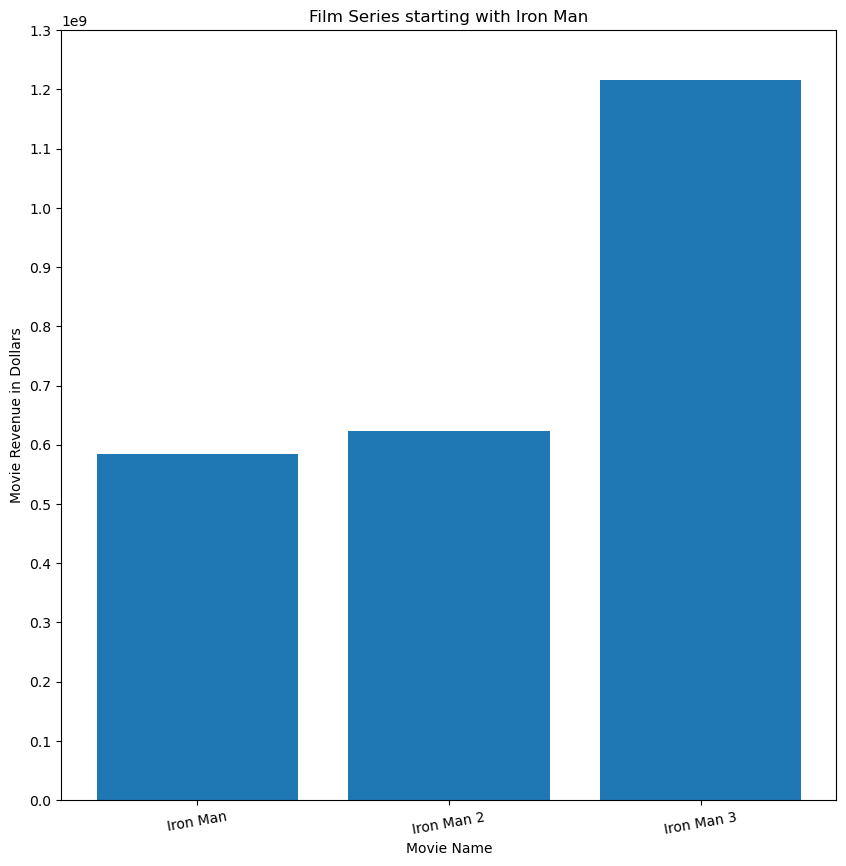

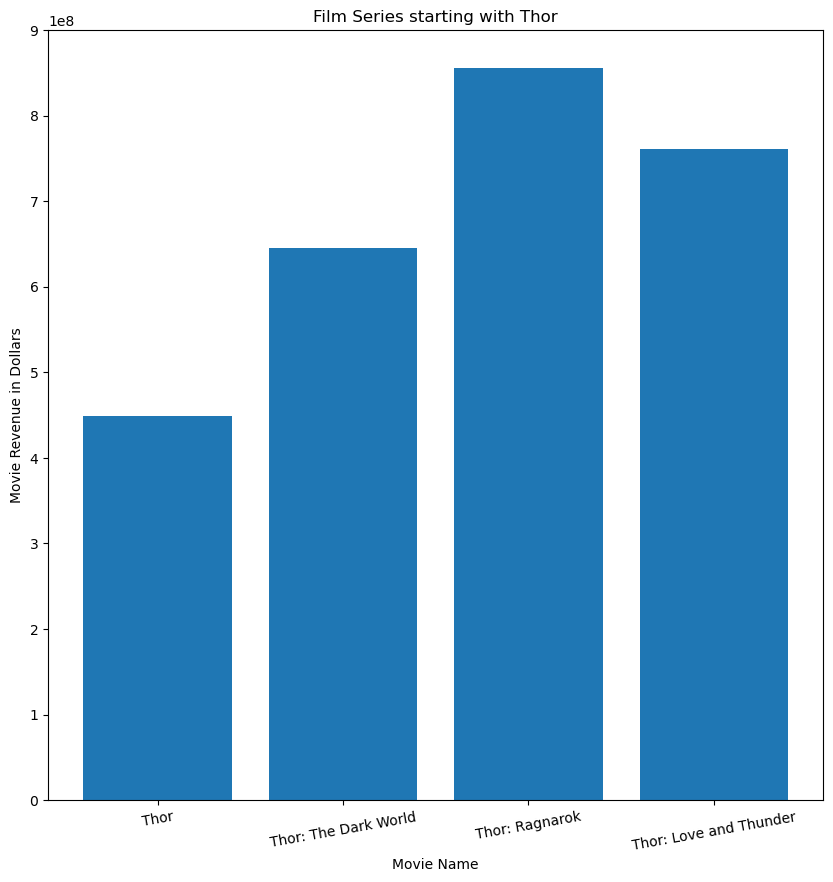

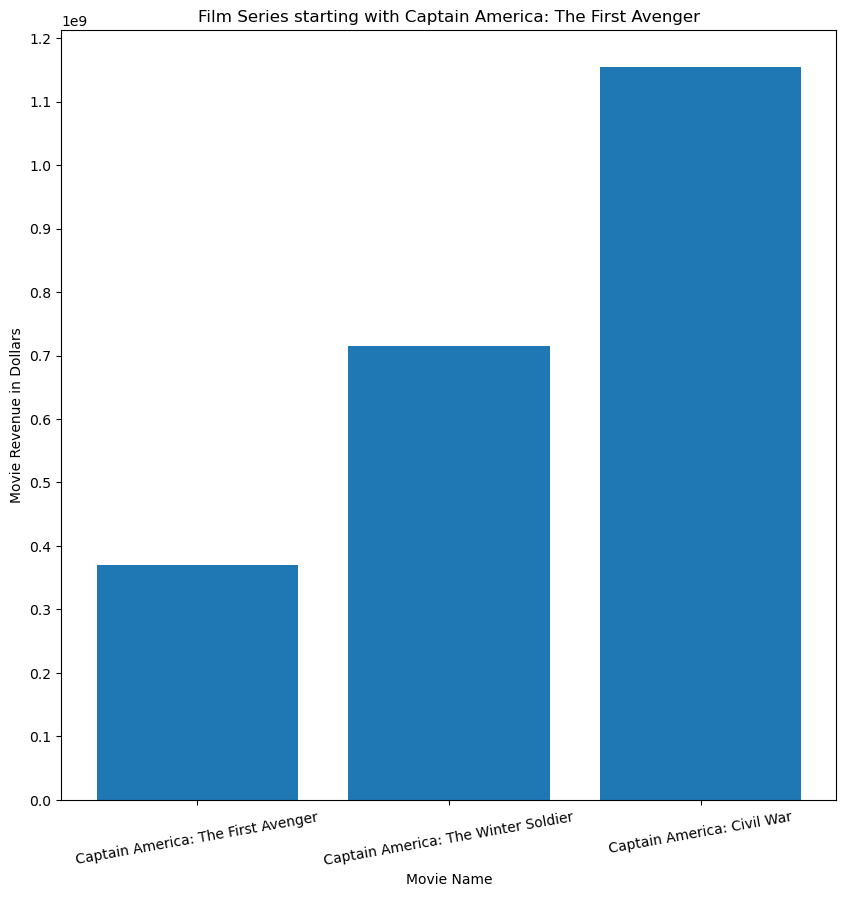

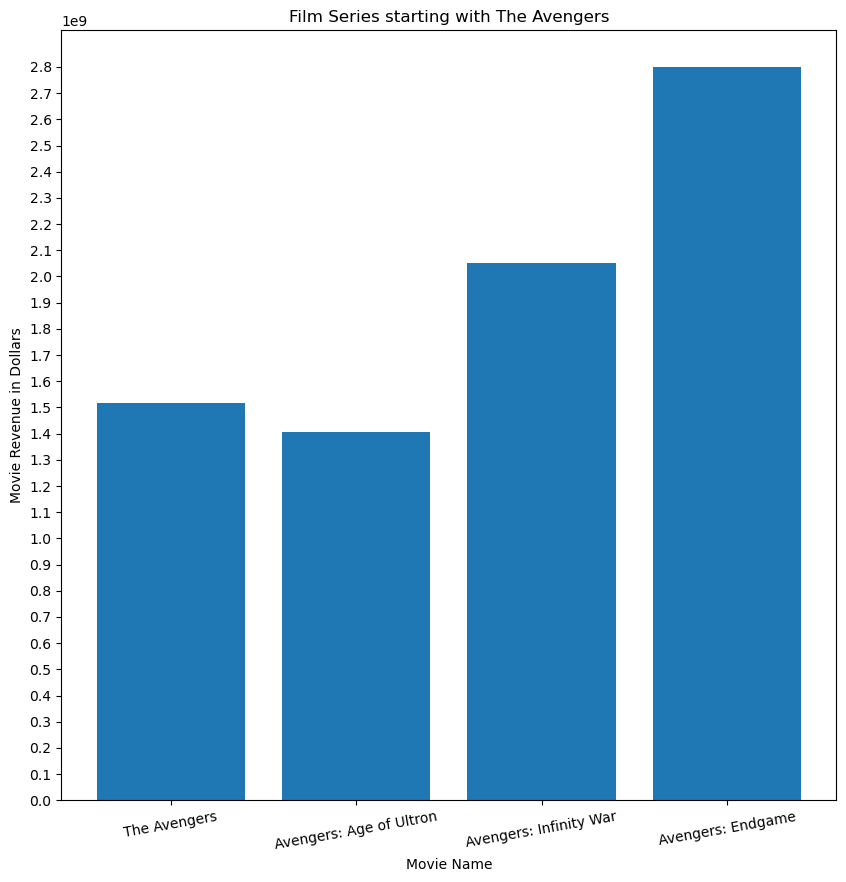

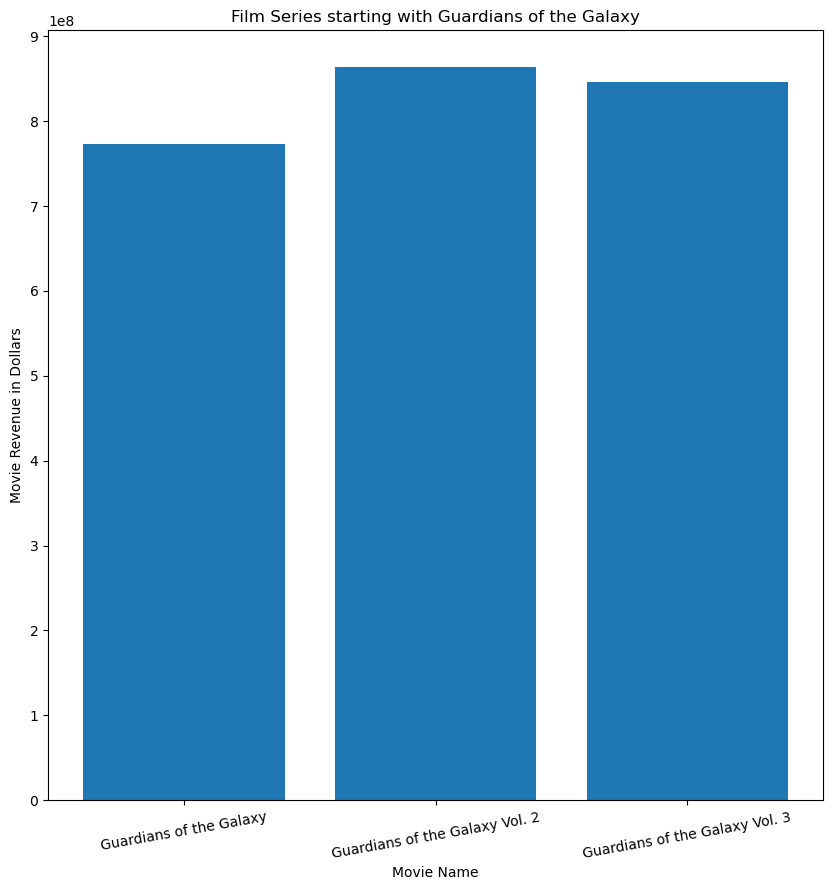

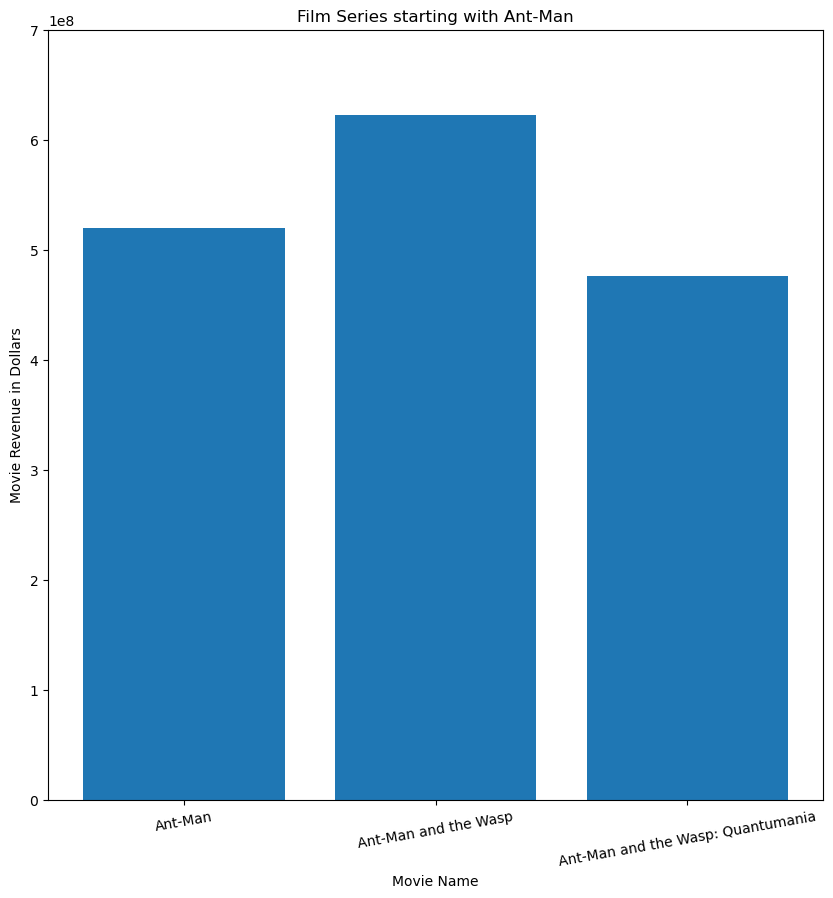

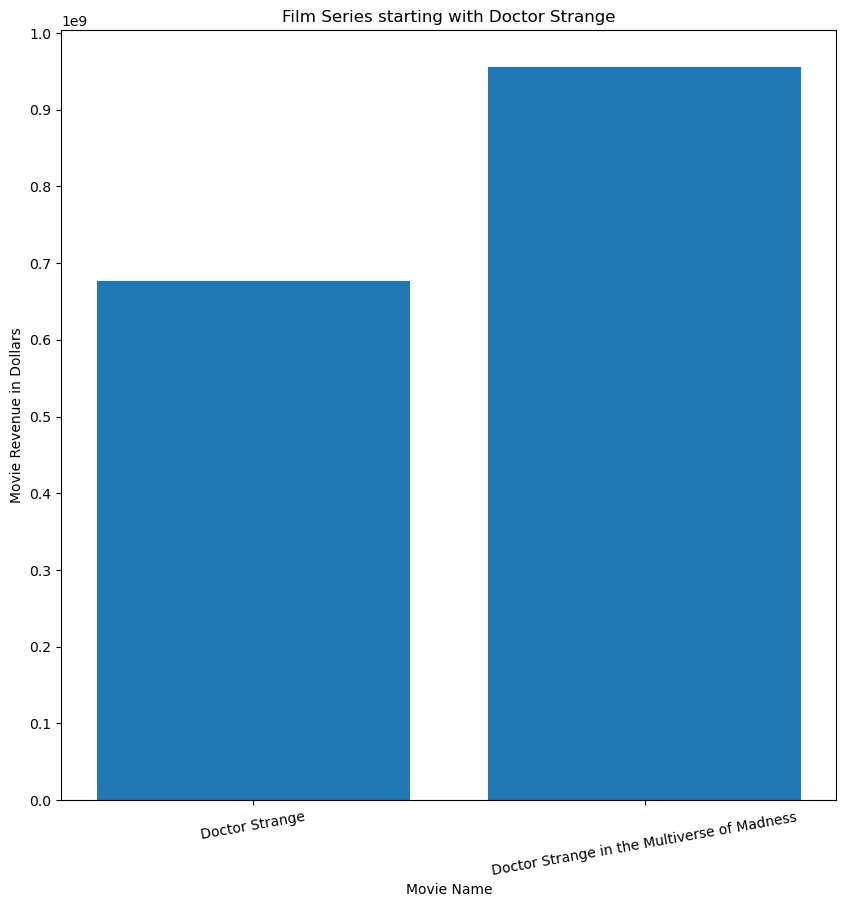

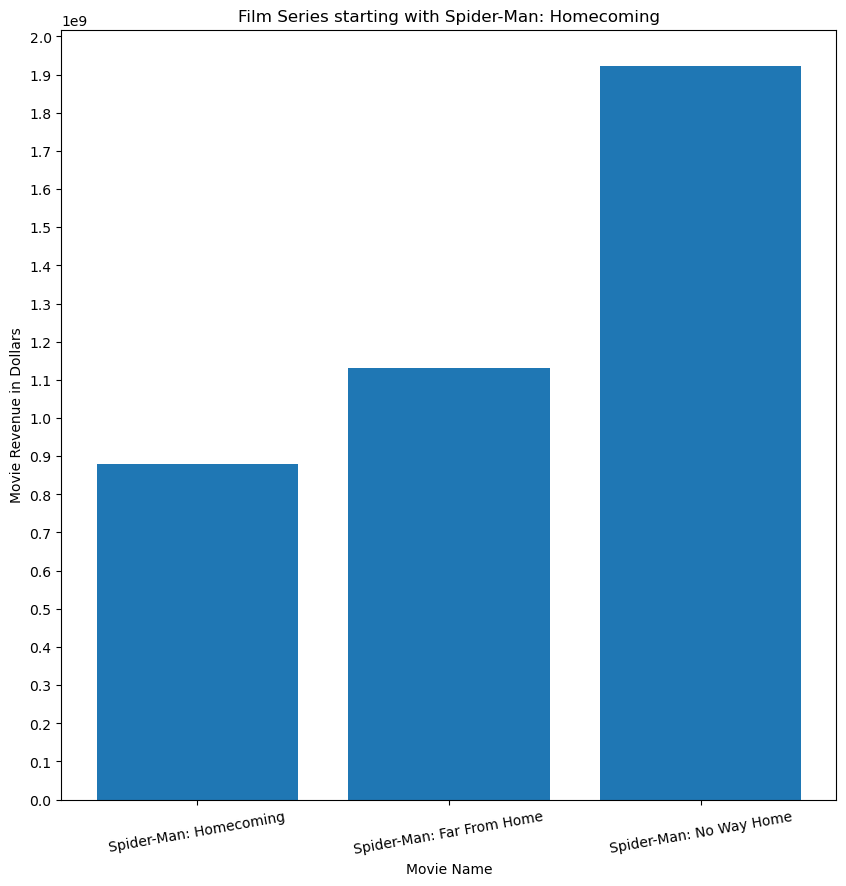

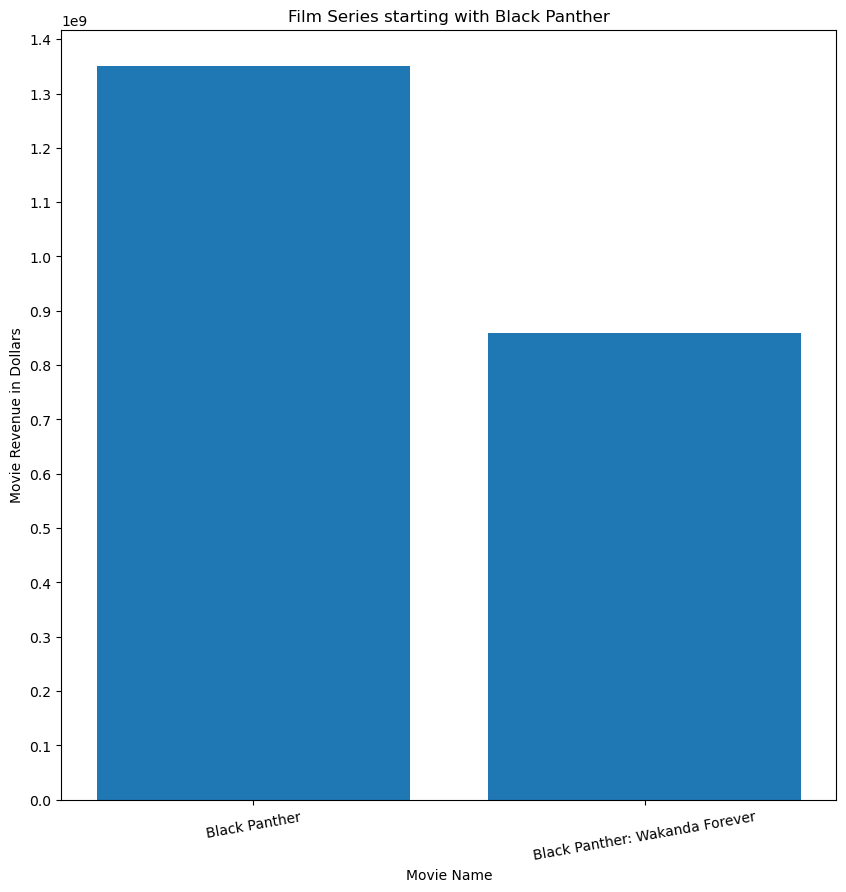

In [215]:
# plotting the film series revenue over time for each cluster showing as a bar plot

for film_series in film_series_sorted:
    film_series_name = 'Film Series     ' + str(film_series)
    film_series_revenue = film_series_sorted[film_series]
    
    # extracting the movie names and revenues
    movie_names = [movie[0] for movie in film_series_revenue]
    movie_revenues = [movie[1] for movie in film_series_revenue]
    
    first_movie_name = movie_names[0]
    # plotting the bar plot
    plt.figure(figsize=(10, 10))
    plt.bar(movie_names, movie_revenues)
    plt.title(f"Film Series starting with {first_movie_name}")
    plt.xlabel('Movie Name')
    plt.ylabel('Movie Revenue in Dollars')
    plt.yticks(np.arange(0, max(movie_revenues) + 100000000, 100000000))
    plt.xticks(rotation=10)
    plt.savefig(PLOT_FOLDER + "/film_series_" + first_movie_name.lower().replace(" ", "_").replace(":", "") + ".png")
    plt.show()

In [216]:
# loading file
df = pd.read_csv('../data/processed/movie_stats/movie_stats_clustered.csv', index_col=0)

In [217]:
df.head()

,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster
0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133,0,2
1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,9,4
2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,5,3
3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,6,7
4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,4,8


In [218]:
movie_successions = []

# (movie_name1, movie_name2, (movie_revenue2/movie_revenue1) - 1, cast_distance_from_first_movie)

for film_series_index, film_series in film_series_sorted.items():
    # print(film_series_index)
    for i in range(len(film_series) - 1):
        movie1 = film_series[i]
        movie2 = film_series[i+1]
        movie_name1 = movie1[0]
        movie_name2 = movie2[0]
        movie_revenue1 = movie1[1]
        movie_revenue2 = movie2[1]
        cast_vector1 = cast_vectors[movie1[2]]
        cast_vector2 = cast_vectors[movie2[2]]
        # distance in percentage
        sum_actors = np.sum(cast_vector1)
        sum_similar_actors = 0
        for i, actor in enumerate(cast_vector1):
            if actor == 1:
                sum_similar_actors += cast_vector2[i]
        
        cast_distance = 1 - sum_similar_actors/sum_actors

        movie_succession = (movie_name1, movie_name2, (movie_revenue2/movie_revenue1) - 1, cast_distance)
        print(movie_succession)
        movie_successions.append(movie_succession)

('Iron Man', 'Iron Man 2', 0.06623516132944074, 0.7096774193548387)
('Iron Man 2', 'Iron Man 3', 0.9482485461255155, 0.8064516129032258)
('Thor', 'Thor: The Dark World', 0.4349987607455741, 0.625)
('Thor: The Dark World', 'Thor: Ragnarok', 0.3264953019708301, 0.7333333333333334)
('Thor: Ragnarok', 'Thor: Love and Thunder', -0.11033967698648817, 0.5769230769230769)
('Captain America: The First Avenger', 'Captain America: The Winter Soldier', 0.9288312813122206, 0.8125)
('Captain America: The Winter Soldier', 'Captain America: Civil War', 0.615977105319917, 0.7352941176470589)
('The Avengers', 'Avengers: Age of Ultron', -0.07467122891485611, 0.6363636363636364)
('Avengers: Age of Ultron', 'Avengers: Infinity War', 0.4603740176308373, 0.53125)
('Avengers: Infinity War', 'Avengers: Endgame', 0.36424648367624823, 0.16666666666666663)
('Guardians of the Galaxy', 'Guardians of the Galaxy Vol. 2', 0.1177305976914933, 0.5945945945945945)
('Guardians of the Galaxy Vol. 2', 'Guardians of the Gala

/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_98623/3235656592.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([ '{:.0f}%'.format(x) for x in plt.gca().get_xticks()], c='#353535')
/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_98623/3235656592.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f"{'+' if x > 0 else '-' if x < 0 else ''}" + '{:.0f}%'.format(x) for x in plt.gca().get_yticks()], c='#353535')


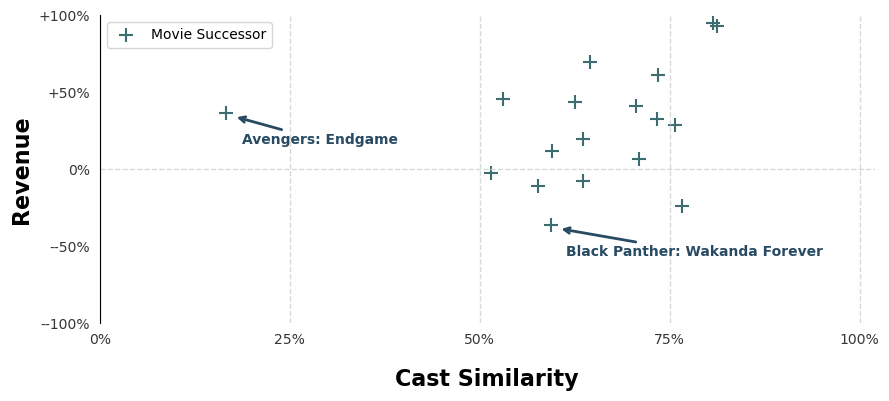

In [219]:
# making scatter plot
# cast similaryty on x
# revenue development on y

# getting the x and y values
from pstats import Stats
from matplotlib.ticker import MultipleLocator


x = [movie_succession[3] * 100 for movie_succession in movie_successions]
y = [movie_succession[2] * 100 for movie_succession in movie_successions]

# plotting the scatter plot
plt.figure(figsize=(10, 4))

# crosses
plt.scatter(x, y, c='#3c6e71', s=100, marker='+', label='Movie Successor')
# plt.title('Revenue of Movie Successor based on Cast Similarity', fontdict={'fontsize': 18 }, y=1.05)

plt.xlabel('Cast Similarity', fontdict={'fontsize': 16, 'fontweight': 'bold'}, labelpad=15)
# x scale from 0 to 100%
plt.xlim(0, 102)

plt.ylabel('Revenue', fontdict={'fontsize': 16, 'fontweight': 'bold'})
# y scale from -1 to 1
plt.ylim(-100, 100)



# remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(axis='x', which='both', bottom=False)
plt.gca().tick_params(axis='y', which='both', left=False)

# plt.gca().xaxis.set_minor_locator(MultipleLocator(12.5))
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.gca().yaxis.set_major_locator(MultipleLocator(50))
# plt.gca().grid(True, axis='y')
plt.gca().grid(True, axis='x', which='major', linestyle='--', c='#d9d9d9', lw=1)
plt.gca().grid(True, axis='x', which='minor', linestyle='--', c='#d9d9d9', lw=0.5)
# plt.gca().grid(True, axis='x', which='minor', linestyle='--')

# +/- percentage sign on x axis ticks
plt.gca().set_xticklabels([ '{:.0f}%'.format(x) for x in plt.gca().get_xticks()], c='#353535')

# percentage sign on y axis ticks
plt.gca().set_yticklabels([f"{'+' if x > 0 else '-' if x < 0 else ''}" + '{:.0f}%'.format(x) for x in plt.gca().get_yticks()], c='#353535')

# horizontal line at 0

annotated_indexes = [17, 9]
# annotating the points
for i, txt in enumerate([movie_succession[1] for movie_succession in movie_successions]):
    # plt.annotate(f"{i}-{txt}", (x[i], y[i]))
    if i in annotated_indexes:
        # bold
        plt.annotate(txt, (x[i] + 1 , y[i] - 2),  fontsize=10, arrowprops=dict(arrowstyle='->', color='#284b63', lw=2), xytext=(x[i] + 2, y[i] - 20), c='#284b63', fontweight='bold')

plt.axhline(y=0, c='#d9d9d9', ls='--', lw=1)


# removing outliers
x = np.array(x)
y = np.array(y)

# removing the outliers
z_scores = np.abs((x - np.mean(x)) / np.std(x))
threshold = 3
x = x[z_scores < threshold]
y = y[z_scores < threshold]

# fitting a linear regression line to the data with removed outliers
m, b = np.polyfit(x, y, 1)

x = np.arange(0, 100, 1)
# plt.plot(x, m*x + b, c='red', lw=0.5, label='Linear Regression without Outliers')
point = 20
# plt.annotate("Linear Regression without Outliers", (point, m*point + b + 5),  fontsize=10, rotation=m*13, c='red')

plt.legend(loc='upper left')

plt.savefig(PLOT_FOLDER + "/revenue_vs_cast_similarity.png")
plt.show()


In [220]:
len(df)

33